ЗОДАЧИ НА ЗАВТРО:
ИЗ ДАТАССЕТА ИЩУ ВЕРМЯ ИГР И ПРАЙМТАЙМ ГЕРОЕВ(СЛОВАРЬ)(EARLY,MID,LATE) И ИХ ВИНРЕЙТ ДЛЯ ЭТИХ ЗНАЧЕНИЙ
ФУНКЦИЯ СР ВИНРЕЙТА ЧАРОВ В EARLY MID LATE У РАДИАНТ И ДАЙР

ПОДРЕДАКТИРУЙ ФУНКЦИЮ PREDICTION(ВЕРОЯТНОСТЬ ПОБЕДЫ В EARLY MID LATE) ДЛЯ КАЖДОГО ЭТАПА ИГРЫ

УДАЧИ НАХЕР КОЛИЧЕСТВО РЕНЖЕЙ


ПРИ ОБУЧЕНИИ ТАРГЕТ-ВРЕМЯ ИГРЫ, ДАТА-ПРОЦЕНТЫ СИЛЫ В ТАЙМ

In [5]:
import numpy as np
import pandas as pd
from enum import Enum
from itertools import combinations, product
import ast

In [6]:
class dota(Enum):
  ANTIMAGE = 1
  AXE = 2
  BANE = 3
  BLOODSEEKER = 4
  CRYSTAL_MAIDEN = 5
  DROW_RANGER = 6
  EARTHSHAKER = 7
  JUGGERNAUT = 8
  MIRANA = 9
  MORPHLING = 10
  SHADOW_FIEND = 11
  PHANTOM_LANCER = 12
  PUCK = 13
  PUDGE = 14
  RAZOR = 15
  SAND_KING = 16
  STORM_SPIRIT = 17
  SVEN = 18
  TINY = 19
  VENGEFULSPIRIT = 20
  WINDRUNNER = 21
  ZUUS = 22
  KUNKKA = 23
  LINA = 25
  LION = 26
  SHADOW_SHAMAN = 27
  SLARDAR = 28
  TIDEHUNTER = 29
  WITCH_DOCTOR = 30
  LICH = 31
  RIKI = 32
  ENIGMA = 33
  TINKER = 34
  SNIPER = 35
  NECROPHOS = 36
  WARLOCK = 37
  BEASTMASTER = 38
  QUEENOFPAIN = 39
  VENOMANCER = 40
  FACELESS_VOID = 41
  WRAITH_KING = 42
  DEATH_PROPHET = 43
  PHANTOM_ASSASSIN = 44
  PUGNA = 45
  TEMPLAR_ASSASSIN = 46
  VIPER = 47
  LUNA = 48
  DRAGON_KNIGHT = 49
  DAZZLE = 50
  CLOCKWERK = 51
  LESHRAC = 52
  FURION = 53
  LIFE_STEALER = 54
  DARK_SEER = 55
  CLINKZ = 56
  OMNIKNIGHT = 57
  ENCHANTRESS = 58
  HUSKAR = 59
  NIGHT_STALKER = 60
  BROODMOTHER = 61
  BOUNTY_HUNTER = 62
  WEAVER = 63
  JAKIRO = 64
  BATRIDER = 65
  CHEN = 66
  SPECTRE = 67
  ANCIENT_APPARITION = 68
  DOOM = 69
  URSA = 70
  SPIRIT_BREAKER = 71
  GYROCOPTER = 72
  ALCHEMIST = 73
  INVOKER = 74
  SILENCER = 75
  OUTWORLD_DESTROYER = 76
  LYCAN = 77
  BREWMASTER = 78
  SHADOW_DEMON = 79
  LONE_DRUID = 80
  CHAOS_KNIGHT = 81
  MEEPO = 82
  TREANT = 83
  OGRE_MAGI = 84
  UNDYING = 85
  RUBICK = 86
  DISRUPTOR = 87
  NYX_ASSASSIN = 88
  NAGA_SIREN = 89
  KEEPER_OF_THE_LIGHT = 90
  WISP = 91
  VISAGE = 92
  SLARK = 93
  MEDUSA = 94
  TROLL_WARLORD = 95
  CENTAUR = 96
  MAGNATAUR = 97
  SHREDDER = 98
  BRISTLEBACK = 99
  TUSK = 100
  SKYWRATH_MAGE = 101
  ABADDON = 102
  ELDER_TITAN = 103
  LEGION_COMMANDER = 104
  TECHIES = 105
  EMBER_SPIRIT = 106
  EARTH_SPIRIT = 107
  UNDERLORD = 108
  TERRORBLADE = 109
  PHOENIX = 110
  ORACLE = 111
  WINTER_WYVERN = 112
  ARC_WARDEN = 113
  MONKEY_KING = 114
  DARK_WILLOW = 119
  PANGOLIER = 120
  GRIMSTROKE = 121
  HOODWINK = 123
  VOID_SPIRIT = 126
  SNAPFIRE = 128
  MARS = 129
  RINGMASTER = 131
  DAWNBREAKER = 135
  MARCI = 136
  PRIMAL_BEAST = 137
  MUERTA = 138
  KEZ = 145

In [7]:
players2025 = pd.read_csv("data/players2025.csv")
players202601 = pd.read_csv("data/players202601.csv")
main_metadata2025 = pd.read_csv("data/main_metadata2025.csv")
main_metadata202601 = pd.read_csv("data/main_metadata202601.csv")
heroesdf = pd.read_csv("data/Constants.Heroes.csv")

players = pd.concat([players2025, players202601])
matches = pd.concat([main_metadata2025, main_metadata202601])

C:\Users\Urodetc\AppData\Local\Temp\ipykernel_13104\770066594.py:1: DtypeWarning: Columns (0: randomed, 1: pred_vict, 2: neutral_item_history, 3: is_roaming, 4: repicked) have mixed types. Specify dtype option on import or set low_memory=False.
  players2025 = pd.read_csv("data/players2025.csv")


In [8]:
print(players["lane_role"].tolist()[5], players['lane'].tolist()[5], players["lh_t"].tolist()[1],players['hero_id'].apply(lambda x: dota(x).name).tolist()[5],players["match_id"].tolist()[:15], sep="\n\n")

3.0

1.0

[0, 5, 10, 19, 27, 35, 43, 57, 66, 73, 84, 93, 109, 120, 133, 148, 160, 168, 180, 187, 187, 197, 216, 221, 222, 223, 225, 236, 240, 240, 253, 259, 276, 284, 286]

ABADDON

[8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107483721, 8107511870, 8107511870, 8107511870, 8107511870, 8107511870]


In [9]:
def synergy(team: list):
    team = np.sort(np.array(team, dtype=np.int16))
    pairs = np.array(list(combinations(team, 2)), dtype=np.int16)
    values = np.fromiter(
        (pair_synergy.get((a, b), 0.5) for a, b in pairs),
        dtype=np.float32,
        count=len(pairs)
    )
    return values.mean()

In [10]:
def counter_synergy(radiant, dire):
  values = np.fromiter(
      (matchup_synergy.get((a,b), 0.0) for a,b in product(radiant,dire)),
      dtype = np.float32
  )
  return values.mean()

In [11]:
def time_strenght(team, duration, duration_ind = 0):
  if duration_ind == 0:
    if duration < 25:
        values = np.array([hero_stats_time.get(a, {}).get(1, 0.0) for a in team], dtype=np.float32)
    elif duration >= 25 and duration < 30:
        values = np.array([hero_stats_time.get(a, {}).get(2, 0.0) for a in team], dtype=np.float32)
    elif duration >= 30 and duration < 32.5:
        values = np.array([hero_stats_time.get(a, {}).get(3, 0.0) for a in team], dtype=np.float32)
    elif duration >= 32.5 and duration < 35:
        values = np.array([hero_stats_time.get(a, {}).get(4, 0.0) for a in team], dtype=np.float32)
    elif duration >= 35 and duration < 37.5:
        values = np.array([hero_stats_time.get(a, {}).get(5, 0.0) for a in team], dtype=np.float32)
    elif duration >= 37.5 and duration < 40:
        values = np.array([hero_stats_time.get(a, {}).get(6, 0.0) for a in team], dtype=np.float32)
    elif duration >= 40 and duration < 50:
        values = np.array([hero_stats_time.get(a, {}).get(7, 0.0) for a in team], dtype=np.float32)
    elif duration >= 50:
        values = np.array([hero_stats_time.get(a, {}).get(8, 0.0) for a in team], dtype=np.float32)
  else:
    values = np.array([hero_stats_time.get(a, {}).get(duration_ind, 0.0) for a in team], dtype=np.float32)
  return values.mean()

In [12]:
'''
data [r1,r2,r3,r4,r5,d1,d2,d3,d4,d5]
target win (0 - radiant 1 dire)
'''
df = players.merge(matches, left_on='match_id', right_on='match_id', how = 'left')
df.rename(columns = {'duration_x':'duration'}, inplace = True )
df.rename(columns = {'radiant_win_x':'radiant_win'}, inplace = True )
df['isRadiant'] = np.where(df['isRadiant']==True, '1', '0').astype(int)
df.rename(columns = {'isRadiant':'teams'}, inplace = True )
df['radiant_win'] = np.where(df['radiant_win']==True, '1', '0').astype(int)

df = df[['match_id', 'hero_id', 'player_slot', 'teams',
             'win', 'radiant_win','duration', 'gold_t', 'lane_role']].dropna()
# df = df[df['duration'] >= 20].copy()
# df = df.drop(df[df['gold_t'] == []].index)
# df = df[len(df['gold_t'].split(', ')) >= 20].copy()
df['gold_t'] = df['gold_t'].apply(ast.literal_eval)
df = df[df['gold_t'].apply(len) >= 15]
df['id'] = df.groupby('match_id').ngroup()
df['gold10'] = df['gold_t'].apply(lambda x: x[10])
df['_grp'] = df.index // 5
df['position'] = (
    df
    .sort_values(['_grp', 'lane_role', 'gold10'])
    .groupby('_grp')
    .cumcount()
    .map(dict(enumerate(np.array([5,1,2,4,3]))))
)

df = df.sort_index().drop(columns=['_grp'])

In [13]:
print(df.info())
d1 = df.copy()
d1['hero_id'] = d1['hero_id'].apply(lambda x: dota(x).name)

<class 'pandas.DataFrame'>
Index: 314400 entries, 0 to 316319
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   match_id     314400 non-null  int64  
 1   hero_id      314400 non-null  int64  
 2   player_slot  314400 non-null  int64  
 3   teams        314400 non-null  int64  
 4   win          314400 non-null  float64
 5   radiant_win  314400 non-null  int64  
 6   duration     314400 non-null  int64  
 7   gold_t       314400 non-null  object 
 8   lane_role    314400 non-null  float64
 9   id           314400 non-null  int64  
 10  gold10       314400 non-null  int64  
 11  position     314400 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 31.2+ MB
None


In [14]:
dota(40)

<dota.VENOMANCER: 40>

In [15]:
teams_expanded = (df.assign(player_slot=df["player_slot"] +(df.groupby(["id", "player_slot"])
.cumcount()+1))
.pivot_table(index="id", columns="player_slot",values="hero_id"))
hero_position = (
    df.groupby('hero_id')['position']
      .apply(list)
      .to_dict()
)
teams_expanded.columns = range(teams_expanded.shape[1])
teams_expanded.columns = ['r_1','r_2','r_3','r_4','r_5','d_1','d_2','d_3','d_4','d_5']
teams_expanded = teams_expanded.merge(df[['id', 'duration']].drop_duplicates(subset=['id']), on='id', how='left')

In [16]:
teams_expanded.head(10)

,id,r_1,r_2,r_3,r_4,r_5,d_1,d_2,d_3,d_4,d_5,duration
0,0,2.0,11.0,95.0,37.0,101.0,102.0,36.0,46.0,22.0,26.0,2059
1,1,11.0,57.0,86.0,70.0,97.0,41.0,74.0,101.0,2.0,79.0,1856
2,2,20.0,25.0,40.0,38.0,6.0,56.0,58.0,55.0,13.0,100.0,2242
3,3,110.0,135.0,86.0,102.0,95.0,99.0,103.0,49.0,76.0,79.0,1608
4,4,126.0,6.0,40.0,136.0,135.0,67.0,38.0,106.0,138.0,110.0,2545
5,5,52.0,94.0,14.0,79.0,129.0,97.0,31.0,113.0,51.0,70.0,3060
6,6,20.0,46.0,86.0,2.0,11.0,31.0,6.0,49.0,25.0,19.0,1612
7,7,66.0,39.0,49.0,86.0,61.0,18.0,11.0,87.0,88.0,98.0,1345
8,8,14.0,53.0,22.0,96.0,67.0,86.0,84.0,16.0,11.0,70.0,1494
9,9,93.0,21.0,71.0,48.0,27.0,86.0,104.0,84.0,74.0,72.0,1784


In [17]:
target = df.groupby('id').min()[['radiant_win']]
target

,radiant_win
id,
0,0
1,0
2,0
3,1
4,0
...,...
31435,0
31436,1
31437,0


In [18]:
def sort_dict(dictionary):
    a = sorted(dictionary.items(), key = lambda x: x[1])
    end_dict = {}
    for i in a:
        end_dict[i[0]] = i[1]
    return end_dict

def dict_to_hero_list(pos_dict):
    return [hero for hero, _ in sorted(pos_dict.items(), key=lambda x: x[1])]

In [19]:
teams_data = []
for index, row in teams_expanded.iterrows():
    match_df = df[df['id'] == index]
    hero_pos_match = dict(zip(match_df['hero_id'], match_df['position']))
    radiant_heroes = row[['r_1','r_2','r_3','r_4','r_5']].astype(int)
    radiant_dict = sort_dict({hero: hero_pos_match[hero] for hero in radiant_heroes})
    dire_heroes = row[['d_1','d_2','d_3','d_4','d_5']].astype(int)
    dire_dict = sort_dict({hero: hero_pos_match[hero] for hero in dire_heroes})
    teams_data.append([radiant_dict, dire_dict, target.loc[index, 'radiant_win'], row['duration']])



teams = pd.DataFrame(
    teams_data,
    columns=['radiant', 'dire', 'radiant_win', 'duration']
)
teams

,radiant,dire,radiant_win,duration
0,"{95: 1, 11: 2, 2: 3, 101: 4, 37: 5}","{46: 1, 36: 2, 102: 3, 26: 4, 22: 5}",0,2059.0
1,"{70: 1, 11: 2, 97: 3, 86: 4, 57: 5}","{41: 1, 74: 2, 2: 3, 101: 4, 79: 5}",0,1856.0
2,"{6: 1, 25: 2, 38: 3, 20: 4, 40: 5}","{13: 1, 100: 2, 58: 3, 55: 4, 56: 5}",0,2242.0
3,"{95: 1, 110: 2, 135: 3, 86: 4, 102: 5}","{76: 1, 79: 2, 103: 3, 49: 4, 99: 5}",1,1608.0
4,"{6: 1, 40: 2, 135: 3, 126: 4, 136: 5}","{67: 1, 106: 2, 38: 3, 138: 4, 110: 5}",0,2545.0
...,...,...,...,...
31435,"{1: 1, 59: 2, 106: 3, 138: 4, 64: 5}","{10: 1, 52: 2, 96: 3, 68: 4, 19: 5}",0,2533.0
31436,"{11: 1, 74: 2, 2: 3, 64: 4, 83: 5}","{48: 1, 52: 2, 29: 3, 19: 4, 37: 5}",1,1808.0
31437,"{54: 1, 13: 2, 14: 3, 101: 4, 5: 5}","{8: 1, 46: 2, 29: 3, 100: 4, 87: 5}",0,1717.0
31438,"{102: 1, 25: 2, 135: 3, 86: 4, 5: 5}","{18: 1, 90: 2, 21: 3, 75: 4, 84: 5}",0,2099.0


In [20]:
expanded_rows = []

for _, row in teams.iterrows():
    radiant_heroes = dict_to_hero_list(row['radiant'])
    dire_heroes = dict_to_hero_list(row['dire'])

    expanded_rows.append(
        radiant_heroes + dire_heroes + [row['radiant_win'], row['duration'] / 60]
    )

columns = (
    [f'r_{i}' for i in range(1, 6)] +
    [f'd_{i}' for i in range(1, 6)] +
    ['radiant_win', 'duration']
)

teams_expanded = pd.DataFrame(expanded_rows, columns=columns)
teams_expanded

,r_1,r_2,r_3,r_4,r_5,d_1,d_2,d_3,d_4,d_5,radiant_win,duration
0,95,11,2,101,37,46,36,102,26,22,0,34.316667
1,70,11,97,86,57,41,74,2,101,79,0,30.933333
2,6,25,38,20,40,13,100,58,55,56,0,37.366667
3,95,110,135,86,102,76,79,103,49,99,1,26.800000
4,6,40,135,126,136,67,106,38,138,110,0,42.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
31435,1,59,106,138,64,10,52,96,68,19,0,42.216667
31436,11,74,2,64,83,48,52,29,19,37,1,30.133333
31437,54,13,14,101,5,8,46,29,100,87,0,28.616667
31438,102,25,135,86,5,18,90,21,75,84,0,34.983333


In [21]:
pos_stats = {}
for i, row in teams.iterrows():
    dire_team, radiant_team = row['dire'], row['radiant']
    for (a,b) in radiant_team.items():
        if (a,b) not in pos_stats:
            pos_stats[(a,b)] = {'matches': 0, 'wins': 0}
        pos_stats[(a,b)]['matches'] += 1
        if row['radiant_win'] == 1:
            pos_stats[(a,b)]['wins'] += 1
    for (a,b) in dire_team.items():
        if (a,b) not in pos_stats:
            pos_stats[(a,b)] = {'matches': 0, 'wins': 0}
        pos_stats[(a,b)]['matches'] += 1
        if row['radiant_win'] == 0:
            pos_stats[(a,b)]['wins'] += 1

for hero in heroesdf['id']:
    for pos in range(1,6):
        if (hero, pos) not in pos_stats:
            pos_stats[(hero, pos)] = {'matches': 2, 'wins': 1}


avg_winrate = {}
all_hero_matches = {}
for (hero, _), (_, _) in pos_stats.items():
    w, m = 0, 0
    for pos in range(1, 6):
        w += pos_stats[(hero, pos)]["wins"]
        m += pos_stats[(hero, pos)]["matches"]
    all_hero_matches[hero] = m
    avg_winrate[hero] = w / m



position_stats = {}
for (hero, pos), stats in pos_stats.items():
    k = all_hero_matches[hero]
    avg = avg_winrate[hero]
    position_stats[(hero, pos)] = (pos_stats[(hero, pos)]["wins"] + k * avg) / (pos_stats[(hero, pos)]["matches"] + k)

print(sorted(position_stats.items(), key=lambda x: -x[1]))


[((66, 5), 0.5808823529411765), ((61, 1), 0.5792540792540792), ((83, 3), 0.5788336933045356), ((66, 2), 0.5779543197616683), ((66, 3), 0.5774099318403116), ((83, 2), 0.5762331838565022), ((89, 5), 0.5747950819672131), ((83, 1), 0.5733634311512416), ((66, 1), 0.5732673267326732), ((89, 1), 0.573170731707317), ((66, 4), 0.5717948717948718), ((83, 4), 0.5717131474103586), ((83, 5), 0.5695538057742782), ((89, 3), 0.5695364238410596), ((61, 5), 0.5686900958466453), ((89, 2), 0.567476948868399), ((61, 4), 0.565008025682183), ((62, 3), 0.5644295302013422), ((89, 4), 0.5629453681710214), ((33, 3), 0.5604203152364273), ((62, 4), 0.5601694915254237), ((61, 3), 0.5597104945717732), ((62, 1), 0.5588235294117647), ((62, 5), 0.5585003232062056), ((62, 2), 0.5567970204841713), ((3, 5), 0.5541832669322709), ((61, 2), 0.5539845758354756), ((90, 4), 0.553686293913904), ((33, 1), 0.5535900104058272), ((33, 2), 0.5523316062176166), ((3, 2), 0.5523038605230387), ((90, 3), 0.5515818431911966), ((3, 1), 0.55

In [22]:
carry_matchup = {}
offlane_matchup = {}
mid_matchup = {}
for i, row in teams.iterrows():
    radiant = row['radiant']
    dire = row['dire']
    radiant_win = row['radiant_win']
    radiant_carry, radiant_mid, radiant_offlane, dire_carry, dire_mid, dire_offlane = 0, 0, 0, 0, 0, 0
    for hero, pos in radiant.items():
        match pos:
            case 1:
                radiant_carry = hero
            case 2:
                radiant_mid = hero
            case 3:
                radiant_offlane = hero

    for hero, pos in dire.items():
        match pos:
            case 1:
                dire_carry = hero
            case 2:
                dire_mid = hero
            case 3:
                dire_offlane = hero


    if (radiant_carry, dire_carry) not in carry_matchup:
        carry_matchup[(radiant_carry, dire_carry)] = {"wins" : 1, "matches" : 2}
    if (radiant_mid, dire_mid) not in mid_matchup:
        mid_matchup[(radiant_mid, dire_mid)] = {"wins" : 1, "matches" : 2}
    if (radiant_offlane, dire_offlane) not in offlane_matchup:
        offlane_matchup[(radiant_offlane, dire_offlane)] = {"wins" : 1, "matches" : 2}
    if (dire_carry, radiant_carry) not in carry_matchup:
        carry_matchup[(dire_carry, radiant_carry)] = {"wins" : 1, "matches" : 2}
    if (dire_mid, radiant_mid) not in mid_matchup:
        mid_matchup[(dire_mid, radiant_mid)] = {"wins" : 1, "matches" : 2}
    if (dire_offlane, radiant_offlane) not in offlane_matchup:
        offlane_matchup[(dire_offlane, radiant_offlane)] = {"wins" : 1, "matches" : 2}

    
    if radiant_win == 1:
        carry_matchup[(radiant_carry, dire_carry)]["wins"] += 1
        mid_matchup[(radiant_mid, dire_mid)]["wins"] += 1
        offlane_matchup[(radiant_offlane, dire_offlane)]["wins"] += 1
    carry_matchup[(radiant_carry, dire_carry)]["matches"] += 1
    mid_matchup[(radiant_mid, dire_mid)]["matches"] += 1
    offlane_matchup[(radiant_offlane, dire_offlane)]["matches"] += 1

    
for (hero1, hero2), _ in carry_matchup.items():
    carry_matchup[(hero1, hero2)] = round((carry_matchup[(hero1, hero2)]['wins'] / carry_matchup[(hero1, hero2)]['matches'])\
                                           - position_stats[(hero1, 1)], 5)
    
for (hero1, hero2), _ in mid_matchup.items():
    mid_matchup[(hero1, hero2)] = round((mid_matchup[(hero1, hero2)]['wins'] / mid_matchup[(hero1, hero2)]['matches'])\
                                           - position_stats[(hero1, 2)], 5)
    
for (hero1, hero2), _ in offlane_matchup.items():
    offlane_matchup[(hero1, hero2)] = round((offlane_matchup[(hero1, hero2)]['wins'] / offlane_matchup[(hero1, hero2)]['matches'])\
                                           - position_stats[(hero1, 3)], 5)


for hero1 in range(1, 146):
    for hero2 in range(1, 146):
        if (hero1, hero2) not in carry_matchup:
            carry_matchup[(hero1, hero2)] = 0
        if (hero1, hero2) not in mid_matchup:
            mid_matchup[(hero1, hero2)] = 0
        if (hero1, hero2) not in offlane_matchup:
            offlane_matchup[(hero1, hero2)] = 0

In [23]:
pair_stats = {}
hero_stats = {}
for i, row in teams.iterrows():
  radiant = list(row['radiant'].keys())
  dire = list(row['dire'].keys())
  radiant_win = row['radiant_win']

  for hero in radiant:
    hero_stats.setdefault(hero, {'matches': 0 , 'wins': 0})
    hero_stats[hero]['matches'] += 1
    if radiant_win == 1:
      hero_stats[hero]['wins'] += 1

  for hero in dire:
    hero_stats.setdefault(hero, {'matches': 0 , 'wins': 0})
    hero_stats[hero]['matches'] += 1
    if radiant_win == 0:
      hero_stats[hero]['wins'] += 1

for i, row in teams.iterrows():
  for a,b in combinations(sorted(row['radiant'].keys()), r=2):
    if (a,b) not in pair_stats:
      pair_stats[(a,b)] = {'matches': 0, 'wins': 0}
    pair_stats[(a,b)]['matches']+=1
    if row['radiant_win'] == 1:
      pair_stats[(a,b)]['wins'] += 1

  for a,b in combinations(sorted(row['dire']), r=2):
    if (a,b) not in pair_stats:
      pair_stats[(a,b)] = {'matches': 0, 'wins': 0}
    pair_stats[(a,b)]['matches'] += 1
    if row['radiant_win'] == 0:
      pair_stats[(a,b)]['wins'] += 1

pair_synergy = {}

for (a,b), stats in pair_stats.items():
  w, m = stats['wins'], stats['matches']

  if m==0 or hero_stats[a]['matches'] == 0:
    continue

  pair_synergy[(a,b)] = w / m - hero_stats[a]['wins'] / hero_stats[a]['matches']

  
pair_synergy

{(2, 11): 0.05296567609915498,
 (2, 37): -0.009030358269648764,
 (2, 95): -0.0004519268970997192,
 (2, 101): -0.01808013202530484,
 (11, 37): -0.04125764202992194,
 (11, 95): -0.03008993043117586,
 (11, 101): 0.011215620002163584,
 (37, 95): -0.0793713081297695,
 (37, 101): -0.05180324590144647,
 (95, 101): -0.07755722004498755,
 (22, 26): -0.036009947948770604,
 (22, 36): -0.005783106960950746,
 (22, 46): 0.035570276497695896,
 (22, 102): 0.059783351558228504,
 (26, 36): 0.059477952750661034,
 (26, 46): 0.028661927188414538,
 (26, 102): 0.008106065878563107,
 (36, 46): -0.14686499940737224,
 (36, 102): 0.02447552447552448,
 (46, 102): -0.03689952271741148,
 (11, 57): -0.08731663622721403,
 (11, 70): 0.010052212237947611,
 (11, 86): 0.01298382545781418,
 (11, 97): -0.0342160724883524,
 (57, 70): 0.07436472346786249,
 (57, 86): 0.1289624246172878,
 (57, 97): 0.008272769444873984,
 (70, 86): 0.021865548507728316,
 (70, 97): 0.022218442236302705,
 (86, 97): -0.06852992076853343,
 (2, 41):

In [24]:
matchup_stats = {}
hero_stats = {}
for i, row in teams.iterrows():
  radiant = list(row['radiant'].keys())
  dire = list(row['dire'].keys())
  radiant_win = row['radiant_win']

  for hero in radiant:
    hero_stats.setdefault(hero, {'matches': 0 , 'wins': 0})
    hero_stats[hero]['matches'] += 1
    if radiant_win == 1:
      hero_stats[hero]['wins'] += 1

  for hero in dire:
    hero_stats.setdefault(hero, {'matches': 0 , 'wins': 0})
    hero_stats[hero]['matches'] += 1
    if radiant_win == 0:
      hero_stats[hero]['wins'] += 1

  for a, b in product(radiant, dire):
    pair = (a,b)
    if pair not in matchup_stats:
      matchup_stats[pair] = {'matches': 0 , 'wins': 0}
    matchup_stats[pair]['matches'] += 1
    if radiant_win == 1:
      matchup_stats[pair]['wins'] += 1

matchup_synergy = {}

for (a,b), stats in matchup_stats.items():
  w, m = stats['wins'], stats['matches']

  if m==0 or hero_stats[a]['matches'] == 0:
    continue

  matchup_synergy[(a,b)] = w / m - hero_stats[a]['wins'] / hero_stats[a]['matches']
matchup_synergy

{(95, 46): -0.04014668003197519,
 (95, 36): 0.0258910558170814,
 (95, 102): -0.12275759283156723,
 (95, 26): 0.07589105581708144,
 (95, 22): 0.04440957433559989,
 (11, 46): -0.029332067604347534,
 (11, 36): -0.10259214086442081,
 (11, 102): 0.022035169809401456,
 (11, 26): 0.05471901644673649,
 (11, 22): 0.00048478221250225495,
 (2, 46): 0.004853456125674616,
 (2, 36): -0.09072970467487751,
 (2, 102): -0.08864114995474387,
 (2, 26): -0.002006653265258951,
 (2, 22): -0.06222728921594034,
 (101, 46): 0.03685036623648413,
 (101, 36): 0.08700234192037465,
 (101, 102): 0.05478945676631303,
 (101, 26): 0.07439729990356797,
 (101, 22): -0.04780651119833762,
 (37, 46): -0.00971258910218653,
 (37, 36): -0.05940203009597539,
 (37, 102): 0.12161558242848647,
 (37, 26): 0.13702654133259606,
 (37, 22): 0.04535987466592939,
 (70, 41): 0.0017506059789927364,
 (70, 74): 0.033000605978992736,
 (70, 2): 0.014440961308941958,
 (70, 101): 0.05730616153454832,
 (70, 79): 0.033000605978992736,
 (11, 41): 0.

In [25]:
hero_stats_time = {}

for _, row in teams.iterrows():
    radiant = list(row['radiant'].keys())
    dire = list(row['dire'].keys())
    radiant_win = row['radiant_win']
    game_time = row['duration'] / 60
    time_category = None
    if game_time < 25:
        time_category = 1
    elif 25 <= game_time < 30:
        time_category = 2
    elif 30 <= game_time < 32.5:
        time_category = 3
    elif 32.5 <= game_time < 35:
        time_category = 4
    elif 35 <= game_time < 37.5:
        time_category = 5
    elif 37.5 <= game_time < 40:
        time_category = 6
    elif 40 <= game_time < 50:
        time_category = 7
    elif game_time >= 50:
        time_category = 8
    if time_category:
        for hero in radiant:
            if hero not in hero_stats_time:
                hero_stats_time[hero] = {1: {'matches': 0, 'wins': 0}, 2: {'matches': 0, 'wins': 0},\
                                              3: {'matches': 0, 'wins': 0}, 4: {'matches': 0, 'wins': 0},\
                                              5: {'matches': 0, 'wins': 0}, 6: {'matches': 0, 'wins': 0},\
                                              7: {'matches': 0, 'wins': 0}, 8: {'matches': 0, 'wins': 0}}
            hero_stats_time[hero][time_category]['matches'] += 1
            if radiant_win == 1:
                hero_stats_time[hero][time_category]['wins'] += 1

        for hero in dire:
            if hero not in hero_stats_time:
                hero_stats_time[hero] = {1: {'matches': 0, 'wins': 0}, 2: {'matches': 0, 'wins': 0},\
                                              3: {'matches': 0, 'wins': 0}, 4: {'matches': 0, 'wins': 0},\
                                              5: {'matches': 0, 'wins': 0}, 6: {'matches': 0, 'wins': 0},\
                                              7: {'matches': 0, 'wins': 0}, 8: {'matches': 0, 'wins': 0}}
            hero_stats_time[hero][time_category]['matches'] += 1
            if radiant_win == 0:
                hero_stats_time[hero][time_category]['wins'] += 1


hero_stats = {}
for hero, times_stats in hero_stats_time.items():
    total_matches = sum(stats['matches'] for stats in times_stats.values())
    total_wins = sum(stats['wins'] for stats in times_stats.values())
    hero_stats[hero] = {'matches': total_matches, 'wins': total_wins}
    
for hero, times_stats in hero_stats_time.items():
    overall_win_rate = hero_stats[hero]['wins'] / hero_stats[hero]['matches'] if hero_stats[hero]['matches'] > 0 else 0
    for time_cat, stats in times_stats.items():
        matches = stats['matches']
        wins = stats['wins']
        if matches > 0:
            hero_stats_time[hero][time_cat] = (wins / matches) - overall_win_rate
        else:
            hero_stats_time[hero][time_cat] = 0.0

hero_stats_time

{95: {1: -0.05229076236473679,
  2: 0.013070542996568568,
  3: -0.0071038680407866095,
  4: -0.021554199657371154,
  5: -0.002955098029072456,
  6: 0.01986695943153921,
  7: 0.05123667793689701,
  8: 0.01398629391231948},
 11: {1: 0.033456406783752723,
  2: -0.000693854988234377,
  3: -0.021103268101963113,
  4: -0.04008590520643418,
  5: -0.006598551120831075,
  6: 0.0741959832921244,
  7: -0.01902139062700392,
  8: -0.015439224695960596},
 2: {1: -0.006245812498677672,
  2: -0.015850477621737413,
  3: 0.007092369891383121,
  4: 0.027770568997809997,
  5: -0.04615851751813904,
  6: -0.016583574108513466,
  7: 0.036115672170499324,
  8: 0.012251325135420599},
 101: {1: 0.037312900926585846,
  2: -0.011915085377438961,
  3: 0.031531217300313885,
  4: 0.00982664405502165,
  5: -0.04243727923195367,
  6: -0.12621727428431617,
  7: -0.00014949994844831727,
  8: 0.034953615453043596},
 37: {1: 0.036332096888151644,
  2: 0.01938932580381425,
  3: -0.009250054412084763,
  4: -0.02554571300266

<Axes: xlabel='time', ylabel='strenght'>

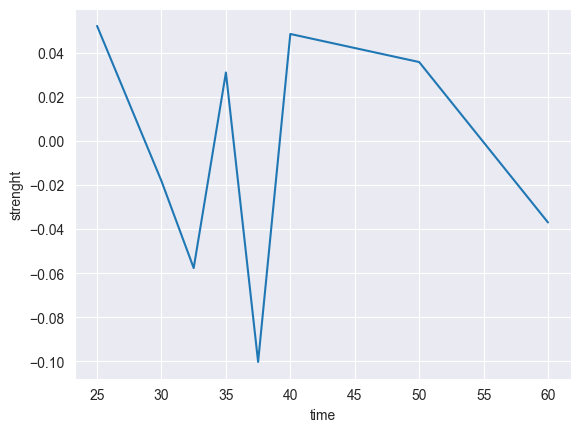

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns
hero_own_st = list(hero_stats_time[59].items())
for i in range(len(hero_own_st)):
  hero_own_st[i]=list(hero_own_st[i])
  game_time=hero_own_st[i][0]
  time_category = None
  if game_time == 1:
      time_category = 25
  elif game_time == 2:
      time_category = 30
  elif game_time == 3:
      time_category = 32.5
  elif game_time == 4:
      time_category = 35
  elif game_time == 5:
      time_category = 37.5
  elif game_time == 6:
      time_category = 40
  elif game_time == 7:
      time_category = 50
  elif game_time == 8:
      time_category = 60
  hero_own_st[i][0]=time_category
gg=pd.DataFrame(hero_own_st,columns=['time', 'strenght'])
sns.set_style("darkgrid")
sns.lineplot(data=gg, x="time", y="strenght")

In [27]:
train = pd.DataFrame()

train['r_synergy'] = teams_expanded[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].apply(lambda x: synergy(x.dropna().tolist()), axis=1)
train['d_synergy'] = teams_expanded[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].apply(lambda x: synergy(x.dropna().tolist()), axis=1)

train['carry_matchup'] = teams_expanded.apply(lambda x: carry_matchup.get((x['r_1'], x['d_1']),0.0),axis=1)
train['mid_matchup'] = teams_expanded.apply(lambda x: mid_matchup.get((x['r_2'], x['d_2']),0.0),axis=1)
train['offlane_matchup'] = teams_expanded.apply(lambda x: offlane_matchup.get((x['r_3'], x['d_3']),0.0),axis=1)

train['r_time'] = teams_expanded.apply(lambda x: time_strenght(x[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].dropna().tolist(), x['duration']), axis=1)
train['d_time'] = teams_expanded.apply(lambda x: time_strenght(x[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].dropna().tolist(), x['duration']), axis=1)

train['csynergy'] = teams_expanded.apply(lambda row: counter_synergy(row[['r_1', 'r_2', 'r_3', 'r_4', 'r_5']].dropna().tolist(), row[['d_1', 'd_2', 'd_3', 'd_4', 'd_5']].dropna().tolist()), axis=1)
train

,r_synergy,d_synergy,carry_matchup,mid_matchup,offlane_matchup,r_time,d_time,csynergy
0,-0.024346,-0.000948,-0.03737,-0.08413,0.03280,-0.009918,0.010601,0.005199
1,0.008866,0.024266,0.01668,0.00946,0.02031,0.016671,-0.015664,-0.014442
2,0.041096,0.022863,-0.13260,0.01638,-0.11668,-0.024691,-0.013534,-0.006895
3,-0.018047,-0.005056,0.27673,0.01559,0.00131,-0.000753,-0.017463,0.045636
4,0.014130,-0.003931,-0.02843,-0.13117,0.03666,-0.003137,-0.006006,-0.023521
...,...,...,...,...,...,...,...,...
31435,0.008911,0.010118,-0.11591,0.16947,-0.01329,-0.004310,0.003659,-0.003306
31436,0.060689,0.000901,-0.03554,-0.10429,0.12169,-0.013584,0.007850,0.016035
31437,-0.028559,0.001715,0.06769,-0.05370,-0.05584,-0.006016,0.010887,0.015793
31438,0.008549,0.017191,-0.10237,0.07194,-0.03715,0.005119,-0.009612,0.013468


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from gbnet.xgbmodule import XGBModule
from xgboost import XGBRegressor

In [31]:
y = target
x = train

In [32]:
class ForecastDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)
        if self.y.ndim == 1:
            self.y = self.y.unsqueeze(1)

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

dataset = ForecastDataset(x, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [33]:
class ForecastModule(nn.Module):
    def __init__(self, dimensions, xgb_module):
        super().__init__()
        self.linear = nn.Linear(dimensions, 1)
        self.xgb = xgb_module  

    def forward(self, t):
        linear_out = self.linear(t)

        if getattr(self.xgb, 'is_trained', False):
            t_np = t.detach().cpu().numpy()
            xgb_out_np = self.xgb(t_np)
            xgb_out = torch.tensor(xgb_out_np, dtype=torch.float32, device=t.device)
        else:
            xgb_out = torch.zeros(t.size(0), 1, device=t.device)

        return linear_out + xgb_out


In [34]:
dimensions = x.shape[1]

pred_linear = torch.zeros((len(x), 1), dtype=torch.float32)


y_array = y.values.ravel().astype('float32')
pred_array = pred_linear.numpy().ravel().astype('float32')

residuals = y_array - pred_array

xgb_pretrain = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_pretrain.fit(x.values.astype('float32'), residuals)  


xgb_module = XGBModule(
    batch_size=len(dataset),
    input_dim=dimensions,
    output_dim=1,
    params={'learning_rate': 0.1}
)

xgb_module.model = xgb_pretrain.get_booster()
xgb_module.is_trained = True 


model = ForecastModule(dimensions=dimensions, xgb_module=xgb_module)
optimizer = torch.optim.Adam(model.linear.parameters(), lr=1e-3)
criterion = nn.MSELoss()

X_tensor = torch.tensor(x.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)
if y_tensor.ndim == 1:
    y_tensor = y_tensor.unsqueeze(1)

num_epochs = 100
for i in range(num_epochs):
    for t_batch, y_batch in loader:
        pred_linear_batch = model.linear(t_batch) 
        loss = nn.MSELoss()(pred_linear_batch, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        pred_full = model(X_tensor) 
        total_loss = nn.MSELoss()(pred_full, y_tensor)

    print(f"Эпоха {i+1}/{num_epochs}, Потери: {total_loss.item():.6f}")

C:\Users\Urodetc\AppData\Local\Temp\ipykernel_9492\1557871733.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xgb_out = torch.tensor(xgb_out_np, dtype=torch.float32, device=t.device)


Эпоха 1/100, Потери: 0.182633
Эпоха 2/100, Потери: 0.163248
Эпоха 3/100, Потери: 0.157197
Эпоха 4/100, Потери: 0.153100
Эпоха 5/100, Потери: 0.150079
Эпоха 6/100, Потери: 0.147994
Эпоха 7/100, Потери: 0.146564
Эпоха 8/100, Потери: 0.145968
Эпоха 9/100, Потери: 0.145053
Эпоха 10/100, Потери: 0.144605
Эпоха 11/100, Потери: 0.144258
Эпоха 12/100, Потери: 0.144157
Эпоха 13/100, Потери: 0.143902
Эпоха 14/100, Потери: 0.143785
Эпоха 15/100, Потери: 0.143763
Эпоха 16/100, Потери: 0.143749
Эпоха 17/100, Потери: 0.143612
Эпоха 18/100, Потери: 0.143592
Эпоха 19/100, Потери: 0.143612
Эпоха 20/100, Потери: 0.143544
Эпоха 21/100, Потери: 0.143536
Эпоха 22/100, Потери: 0.143524
Эпоха 23/100, Потери: 0.143539
Эпоха 24/100, Потери: 0.143554
Эпоха 25/100, Потери: 0.143526
Эпоха 26/100, Потери: 0.143510
Эпоха 27/100, Потери: 0.143506
Эпоха 28/100, Потери: 0.143524
Эпоха 29/100, Потери: 0.143503
Эпоха 30/100, Потери: 0.143506
Эпоха 31/100, Потери: 0.143518
Эпоха 32/100, Потери: 0.143501
Эпоха 33/100, Пот

In [35]:
model.__dict__

{'training': True,
 '_parameters': {},
 '_buffers': {},
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': {'linear': Linear(in_features=8, out_features=1, bias=True),
  'xgb': XGBModule()}}

In [29]:
import torch
import joblib

torch.save(model.linear.state_dict(), r"model\linear_layer.pth")

joblib.dump(model.xgb.model, r"model\xgb_model.pkl")

NameError: name 'model' is not defined

In [37]:
def prediction(radiant, dire, model):
    r_synergy_val = synergy(radiant)
    d_synergy_val = synergy(dire)
    csynergy_val = counter_synergy(radiant, dire)
    carry = carry_matchup[radiant[0], dire[0]]
    mid = mid_matchup[radiant[1], dire[1]]
    offlane = offlane_matchup[radiant[2], dire[2]]

    results = []

    for duration in range(1, 9):
        input_features = [
            r_synergy_val,
            d_synergy_val,
            csynergy_val,
            time_strenght(radiant, duration, duration),
            time_strenght(dire, duration, duration),
            carry,
            mid,
            offlane
        ]

        X_tensor = torch.tensor([input_features], dtype=torch.float32)
        with torch.no_grad():
            pred_tensor = model(X_tensor) 
            prob_radiant = torch.sigmoid(pred_tensor).item() 
            prob_dire = 1 - prob_radiant

        results.append({
            "Radiant": prob_radiant,
            "Dire": prob_dire,
            "Time": duration
        })

    return results

In [38]:
dota.TINY

<dota.TINY: 19>

In [39]:
model.eval()

pred_result = prediction(
    radiant=[1,59,2,4,17],
    dire=[14,11,19,6,5],
    model=model  
)

for t in pred_result:
    print(t)


{'Radiant': 0.8949925899505615, 'Dire': 0.10500741004943848, 'Time': 1}
{'Radiant': 0.8947820663452148, 'Dire': 0.10521793365478516, 'Time': 2}
{'Radiant': 0.8943232297897339, 'Dire': 0.10567677021026611, 'Time': 3}
{'Radiant': 0.8958680033683777, 'Dire': 0.10413199663162231, 'Time': 4}
{'Radiant': 0.8926282525062561, 'Dire': 0.1073717474937439, 'Time': 5}
{'Radiant': 0.8954092860221863, 'Dire': 0.10459071397781372, 'Time': 6}
{'Radiant': 0.8949334025382996, 'Dire': 0.10506659746170044, 'Time': 7}
{'Radiant': 0.8974875807762146, 'Dire': 0.1025124192237854, 'Time': 8}


C:\Users\Urodetc\AppData\Local\Temp\ipykernel_9492\1557871733.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xgb_out = torch.tensor(xgb_out_np, dtype=torch.float32, device=t.device)


In [32]:
from prediction_model import PredictionModel
xgb_module = joblib.load('model/xgb_model.pkl')
linear_model=torch.load(r"model\linear_layer.pth")
Prediction = PredictionModel(carry_matchup, mid_matchup, offlane_matchup, pair_synergy, matchup_synergy, hero_stats_time, xgb_module, linear_model)


In [33]:
joblib.dump(Prediction, "model/prediction.pkl")

['model/prediction.pkl']

In [55]:
gg = joblib.load('model/prediction.pkl')

In [56]:
print(gg)

In [57]:
gg.prediction([1,2,3,4,5],[6,7,8,9,19])

[{'Radiant': 0.7308060526847839, 'Dire': 0.26919394731521606, 'Time': 1},
 {'Radiant': 0.7414073944091797, 'Dire': 0.2585926055908203, 'Time': 2},
 {'Radiant': 0.7419319152832031, 'Dire': 0.2580680847167969, 'Time': 3},
 {'Radiant': 0.7474209070205688, 'Dire': 0.25257909297943115, 'Time': 4},
 {'Radiant': 0.7425301671028137, 'Dire': 0.2574698328971863, 'Time': 5},
 {'Radiant': 0.7353292107582092, 'Dire': 0.26467078924179077, 'Time': 6},
 {'Radiant': 0.740250289440155, 'Dire': 0.25974971055984497, 'Time': 7},
 {'Radiant': 0.7443660497665405, 'Dire': 0.2556339502334595, 'Time': 8}]